# importing libraries

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import json
import numpy
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [6]:
dataset=pd.read_csv('C:\\Users\\USER\\Desktop\\depesen\\scores.csv')
dataset.head(5)

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


In [7]:
# checking the shape of the dataset
dataset.shape

(55, 12)

In [8]:
#checking the info of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   number     55 non-null     object 
 1   days       55 non-null     int64  
 2   gender     55 non-null     int64  
 3   age        55 non-null     object 
 4   afftype    23 non-null     float64
 5   melanch    20 non-null     float64
 6   inpatient  23 non-null     float64
 7   edu        53 non-null     object 
 8   marriage   23 non-null     float64
 9   work       23 non-null     float64
 10  madrs1     23 non-null     float64
 11  madrs2     23 non-null     float64
dtypes: float64(7), int64(2), object(3)
memory usage: 5.3+ KB


In [9]:
#checking for null value
dataset.isnull().sum().any()

True

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
days,55.0,12.600000,2.491467,5.0,13.0,13.0,13.0,20.0
gender,55.0,1.454545,0.502519,1.0,1.0,1.0,2.0,2.0
afftype,23.0,1.739130,0.540824,1.0,1.0,2.0,2.0,3.0
melanch,20.0,1.950000,0.223607,1.0,2.0,2.0,2.0,2.0
inpatient,23.0,1.782609,0.421741,1.0,2.0,2.0,2.0,2.0
marriage,23.0,1.521739,0.510754,1.0,1.0,2.0,2.0,2.0
work,23.0,1.869565,0.344350,1.0,2.0,2.0,2.0,2.0
madrs1,23.0,22.739130,4.797892,13.0,18.5,24.0,26.0,29.0
madrs2,23.0,20.000000,4.729021,11.0,16.0,21.0,24.5,28.0


# EDA

<function matplotlib.pyplot.show(close=None, block=None)>

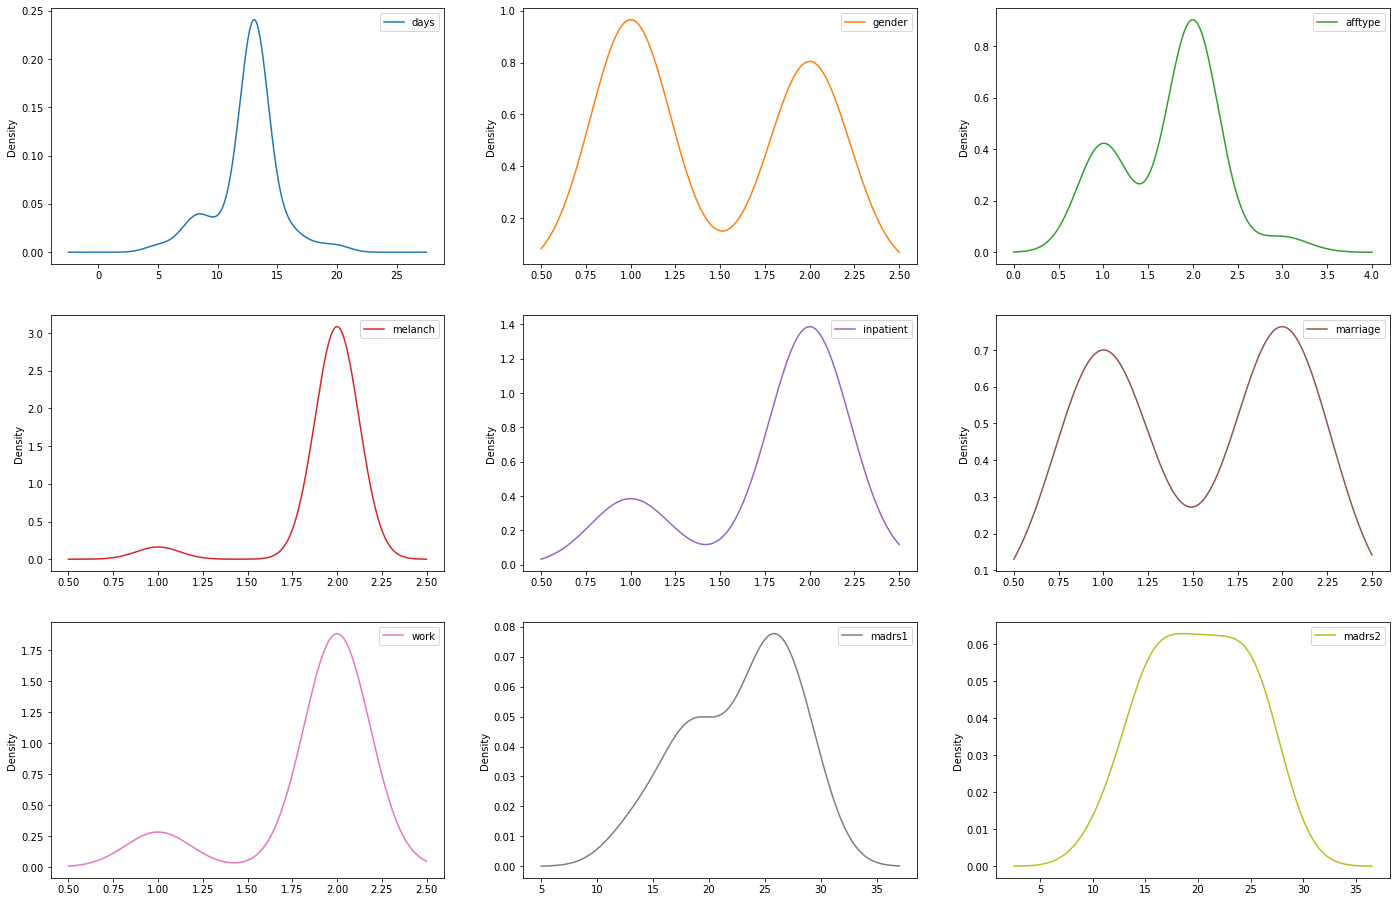

In [15]:
dataset.plot(kind='density',subplots=True,layout=(3,3),figsize=(24,16),sharex=False)
plt.show

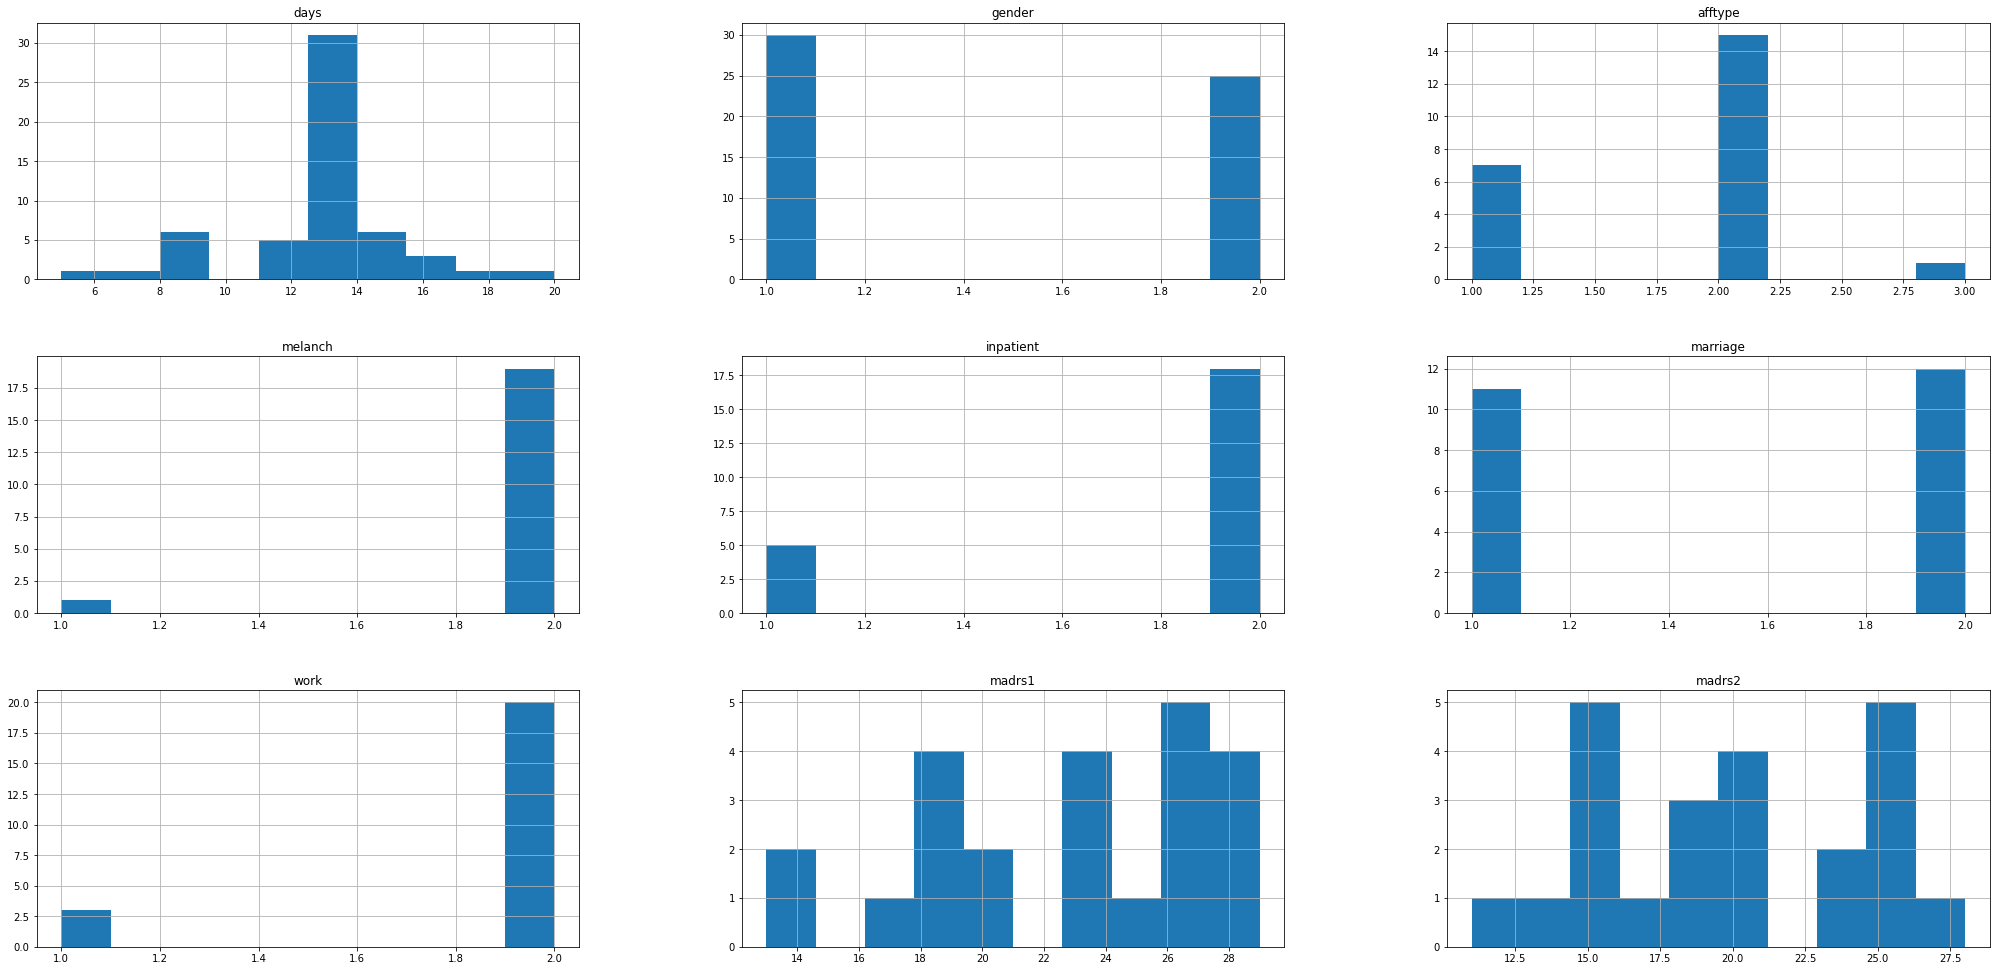

In [16]:
dataset.hist(figsize=(35,17))
plt.show()

In [17]:
dataset.corr()

,days,gender,afftype,melanch,inpatient,marriage,work,madrs1,madrs2
days,1.000000,-0.073955,-0.184464,0.010070,-0.223032,0.390647,0.045526,0.122678,0.027726
gender,-0.073955,1.000000,0.064884,0.253629,0.175655,0.038169,-0.079259,-0.104832,-0.303410
afftype,-0.184464,0.064884,1.000000,-0.089984,-0.259938,-0.143091,0.053060,-0.132523,0.088863
melanch,0.010070,0.253629,-0.089984,1.000000,0.397360,0.253629,-0.076472,-0.202332,-0.270243
inpatient,-0.223032,0.175655,-0.259938,0.397360,1.000000,-0.293590,-0.204124,-0.523501,-0.410235
marriage,0.390647,0.038169,-0.143091,0.253629,-0.293590,1.000000,0.146077,0.447590,0.150551
work,0.045526,-0.079259,0.053060,-0.076472,-0.204124,0.146077,1.000000,0.281104,0.027913
madrs1,0.122678,-0.104832,-0.132523,-0.202332,-0.523501,0.447590,0.281104,1.000000,0.653090
madrs2,0.027726,-0.303410,0.088863,-0.270243,-0.410235,0.150551,0.027913,0.653090,1.000000


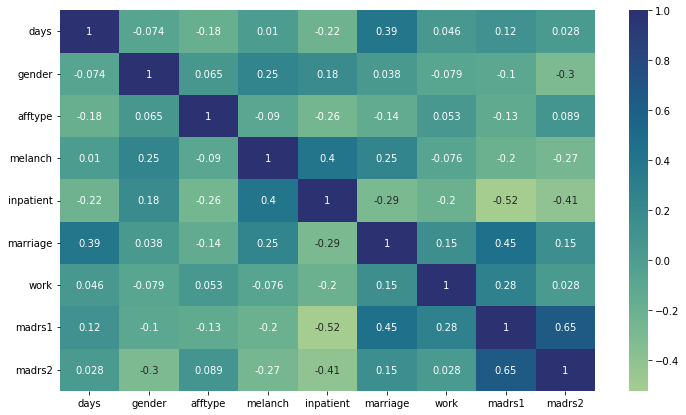

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(dataset.corr(),annot=True,cmap='crest')
plt.show()

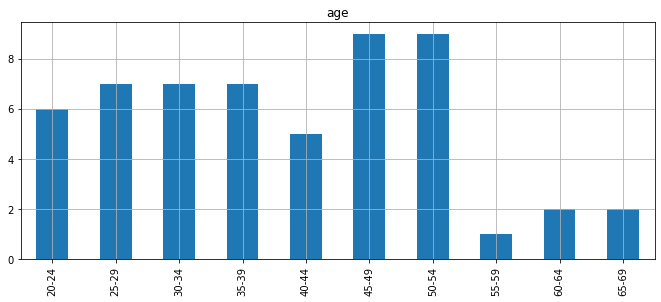

In [21]:
plt.figure(figsize=(25,20))
plt.subplot(4,2,1)
dataset["age"].value_counts().sort_index().plot(kind="bar")
plt.title("age")
plt.grid()

<AxesSubplot:xlabel='age', ylabel='madrs1'>

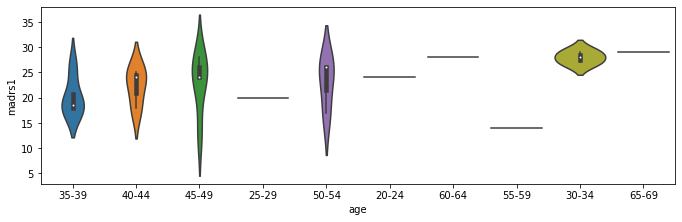

In [22]:
plt.figure(figsize=(25,15))
plt.subplot(4,2,1)
sns.violinplot(x='age',y='madrs1',data=dataset)

<AxesSubplot:xlabel='gender', ylabel='madrs1'>

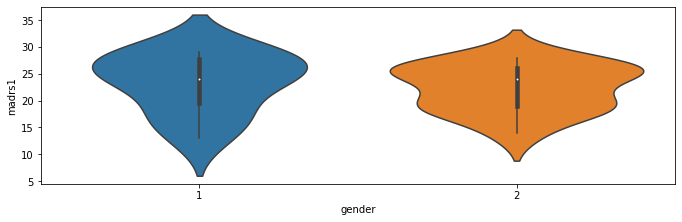

In [25]:
plt.figure(figsize=(25,15))
plt.subplot(4,2,2)
sns.violinplot(x='gender',y='madrs1',data=dataset)

<AxesSubplot:xlabel='work', ylabel='madrs1'>

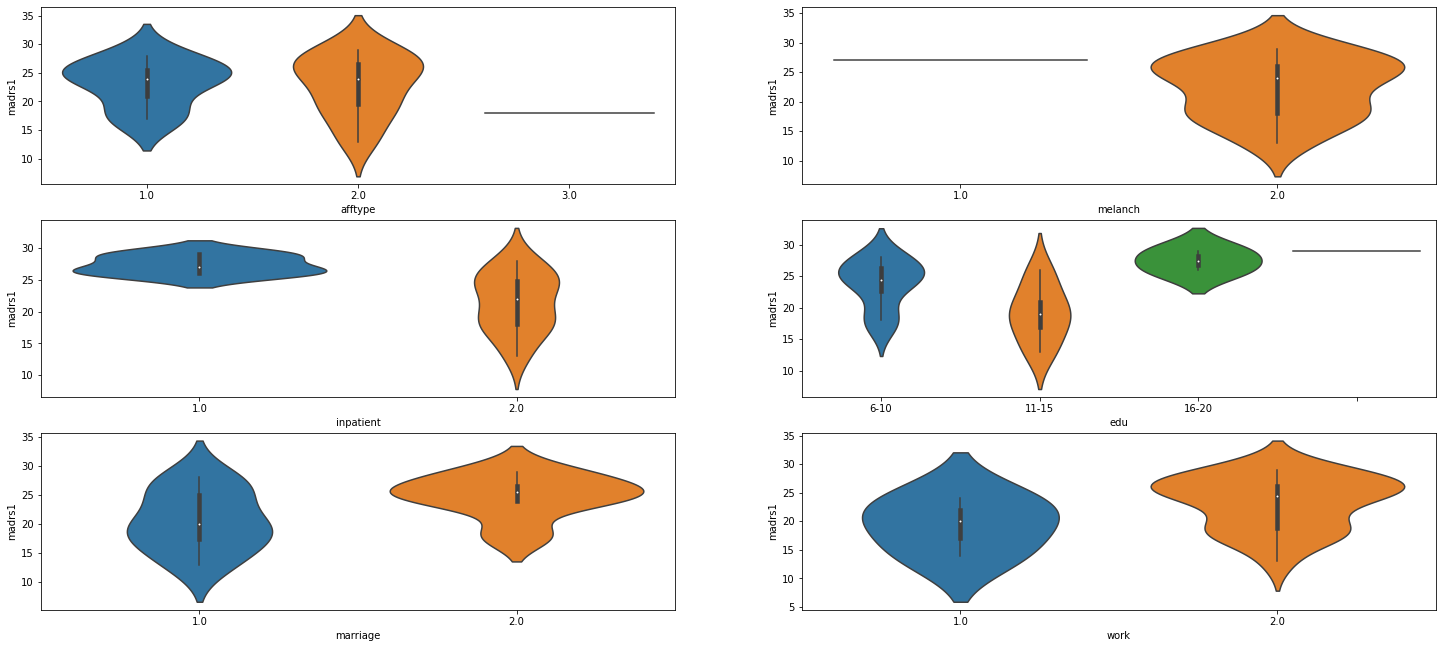

In [26]:
plt.figure(figsize=(25,15))
plt.subplot(4,2,3)
sns.violinplot(x='afftype',y='madrs1',data=dataset)

plt.subplot(4,2,4)
sns.violinplot(x='melanch',y='madrs1',data=dataset)

plt.subplot(4,2,5)
sns.violinplot(x='inpatient',y='madrs1',data=dataset)

plt.subplot(4,2,6)
sns.violinplot(x='edu',y='madrs1',data=dataset)

plt.subplot(4,2,7)
sns.violinplot(x='marriage',y='madrs1',data=dataset)

plt.subplot(4,2,8)
sns.violinplot(x='work',y='madrs1',data=dataset)